### Machine Learning using MNIST Dataset
1. Dataset: https://www.kaggle.com/c/digit-recognizer/data
---Download the dataset and upload the folder to your google drive
---I have downloaded it then loaded the data from PC
2. Problem statement: Handwritten digit recognization (0-9)
3. Type of problem: Classification, Supervised
4. Data type: Images stored in csv file
5. Performance Measures: Accuracy, Precision, Recall, Confusion Matrix
6. Feature Importance: Not required
7. Interpretability: We can provide nearest neighbors of the query image to justify why image is classified as 'this'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [2]:
mnist_train = pd.read_csv("/home/pranjal/Documents/sem 2/all sem 1-2 data/digit-recognizer/train.csv")
mnist_test  = pd.read_csv("/home/pranjal/Documents/sem 2/all sem 1-2 data/digit-recognizer/test.csv")

In [3]:
mnist_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


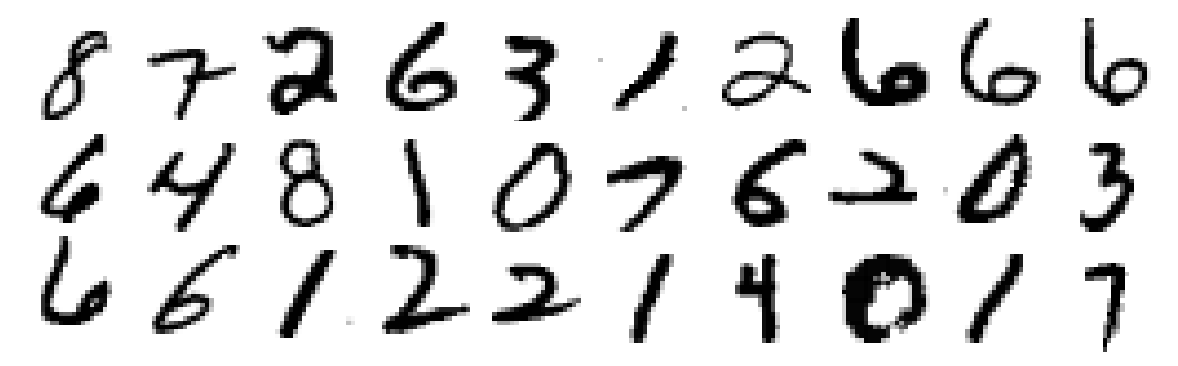

In [4]:
samples = mnist_train.iloc[5000:5030,1:].values
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(samples[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [5]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(mnist_train.shape, mnist_test.shape)

(42000, 785) (28000, 784)


### Check whether data is balanced or imbalanced

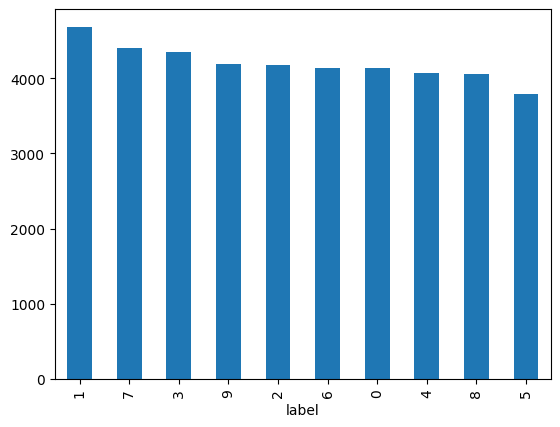

In [7]:
_ = mnist_train['label'].value_counts().plot(kind='bar')
plt.show()

From above figure one can conclude that dataset is balanced

In [8]:
X_raw = mnist_train.drop(['label'], axis = 1, inplace = False)
y = mnist_train['label']
#Data is being Scaled now to make it uniform
#%%time
# Wall time: 28.5 s
arr = X_raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

In [9]:
X.max()

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
779    1.0
780    0.0
781    0.0
782    0.0
783    0.0
Length: 784, dtype: float64

#Divide data into 3 parts

Train - To calculate nearest neighbors
cross-validation: To find optimal value of k (Hyperparameter)
Test: To test final accuracy of the model

In [12]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

(25200, 784) (10500, 784) (6300, 784) (25200,) (10500,) (6300,)


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [13]:
%time
logistic = LogisticRegression(solver='saga', tol=1e-3,n_jobs=2,multi_class = "multinomial")
randVals = []
for i in range(4):
    randVals.append(random.uniform(0,4))
distributions = dict(C=randVals, penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0, verbose = 1000)
search = clf.fit(X_1, y_1)

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 55.1 µs
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START C=0.1235705151521369, penalty=l2............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 1/5; 1/8] END C=0.1235705151521369, penalty=l2;, score=0.925 total time= 2.8min
[CV 2/5; 1/8] START C=0.1235705151521369, penalty=l2............................
[CV 2/5; 1/8] END C=0.1235705151521369, penalty=l2;, score=0.922 total time= 2.0min
[CV 3/5; 1/8] START C=0.1235705151521369, penalty=l2............................
[CV 3/5; 1/8] END C=0.1235705151521369, penalty=l2;, score=0.917 total time= 2.0min
[CV 4/5; 1/8] START C=0.1235705151521369, penalty=l2............................
[CV 4/5; 1/8] END C=0.1235705151521369, penalty=l2;, score=0.917 total time= 2.5min
[CV 5/5; 1/8] START C=0.1235705151521369, penalty=l2............................
[CV 5/5; 1/8] END C=0.1235705151521369, penalty=l2;, score=0.915 total time= 2.1min
[CV 1/5; 2/8] START C=0.1235705151521369, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 2/8] END C=0.1235705151521369, penalty=l1;, score=0.914 total time= 7.3min
[CV 2/5; 2/8] START C=0.1235705151521369, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 2/8] END C=0.1235705151521369, penalty=l1;, score=0.915 total time= 7.0min
[CV 3/5; 2/8] START C=0.1235705151521369, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 2/8] END C=0.1235705151521369, penalty=l1;, score=0.907 total time= 9.1min
[CV 4/5; 2/8] START C=0.1235705151521369, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 2/8] END C=0.1235705151521369, penalty=l1;, score=0.911 total time= 9.8min
[CV 5/5; 2/8] START C=0.1235705151521369, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 2/8] END C=0.1235705151521369, penalty=l1;, score=0.906 total time= 8.1min
[CV 1/5; 3/8] START C=1.6212780232288266, penalty=l2............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 3/8] END C=1.6212780232288266, penalty=l2;, score=0.921 total time= 4.8min
[CV 2/5; 3/8] START C=1.6212780232288266, penalty=l2............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 3/8] END C=1.6212780232288266, penalty=l2;, score=0.919 total time= 4.9min
[CV 3/5; 3/8] START C=1.6212780232288266, penalty=l2............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 3/8] END C=1.6212780232288266, penalty=l2;, score=0.912 total time= 4.5min
[CV 4/5; 3/8] START C=1.6212780232288266, penalty=l2............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 3/8] END C=1.6212780232288266, penalty=l2;, score=0.912 total time= 3.9min
[CV 5/5; 3/8] START C=1.6212780232288266, penalty=l2............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 3/8] END C=1.6212780232288266, penalty=l2;, score=0.914 total time= 4.1min
[CV 1/5; 4/8] START C=1.6212780232288266, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 4/8] END C=1.6212780232288266, penalty=l1;, score=0.920 total time=13.5min
[CV 2/5; 4/8] START C=1.6212780232288266, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 4/8] END C=1.6212780232288266, penalty=l1;, score=0.921 total time=10.7min
[CV 3/5; 4/8] START C=1.6212780232288266, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 4/8] END C=1.6212780232288266, penalty=l1;, score=0.915 total time=10.2min
[CV 4/5; 4/8] START C=1.6212780232288266, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 4/8] END C=1.6212780232288266, penalty=l1;, score=0.915 total time=10.1min
[CV 5/5; 4/8] START C=1.6212780232288266, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 4/8] END C=1.6212780232288266, penalty=l1;, score=0.915 total time=10.0min
[CV 1/5; 5/8] START C=2.283645894551955, penalty=l2.............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 5/8] END C=2.283645894551955, penalty=l2;, score=0.919 total time= 3.9min
[CV 2/5; 5/8] START C=2.283645894551955, penalty=l2.............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 5/8] END C=2.283645894551955, penalty=l2;, score=0.919 total time= 3.9min
[CV 3/5; 5/8] START C=2.283645894551955, penalty=l2.............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 5/8] END C=2.283645894551955, penalty=l2;, score=0.911 total time= 3.9min
[CV 4/5; 5/8] START C=2.283645894551955, penalty=l2.............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 5/8] END C=2.283645894551955, penalty=l2;, score=0.912 total time= 3.9min
[CV 5/5; 5/8] START C=2.283645894551955, penalty=l2.............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 5/8] END C=2.283645894551955, penalty=l2;, score=0.913 total time= 3.9min
[CV 1/5; 6/8] START C=2.283645894551955, penalty=l1.............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 6/8] END C=2.283645894551955, penalty=l1;, score=0.920 total time=10.7min
[CV 2/5; 6/8] START C=2.283645894551955, penalty=l1.............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 6/8] END C=2.283645894551955, penalty=l1;, score=0.920 total time=10.7min
[CV 3/5; 6/8] START C=2.283645894551955, penalty=l1.............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 6/8] END C=2.283645894551955, penalty=l1;, score=0.914 total time=10.7min
[CV 4/5; 6/8] START C=2.283645894551955, penalty=l1.............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 6/8] END C=2.283645894551955, penalty=l1;, score=0.914 total time=10.7min
[CV 5/5; 6/8] START C=2.283645894551955, penalty=l1.............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 6/8] END C=2.283645894551955, penalty=l1;, score=0.914 total time=10.5min
[CV 1/5; 7/8] START C=3.4105275884773842, penalty=l2............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 7/8] END C=3.4105275884773842, penalty=l2;, score=0.919 total time= 3.9min
[CV 2/5; 7/8] START C=3.4105275884773842, penalty=l2............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 7/8] END C=3.4105275884773842, penalty=l2;, score=0.919 total time= 3.9min
[CV 3/5; 7/8] START C=3.4105275884773842, penalty=l2............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 7/8] END C=3.4105275884773842, penalty=l2;, score=0.912 total time= 3.9min
[CV 4/5; 7/8] START C=3.4105275884773842, penalty=l2............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 7/8] END C=3.4105275884773842, penalty=l2;, score=0.911 total time= 3.9min
[CV 5/5; 7/8] START C=3.4105275884773842, penalty=l2............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 7/8] END C=3.4105275884773842, penalty=l2;, score=0.913 total time= 3.9min
[CV 1/5; 8/8] START C=3.4105275884773842, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 8/8] END C=3.4105275884773842, penalty=l1;, score=0.919 total time=10.7min
[CV 2/5; 8/8] START C=3.4105275884773842, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 8/8] END C=3.4105275884773842, penalty=l1;, score=0.920 total time=10.9min
[CV 3/5; 8/8] START C=3.4105275884773842, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 8/8] END C=3.4105275884773842, penalty=l1;, score=0.912 total time=10.7min
[CV 4/5; 8/8] START C=3.4105275884773842, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 8/8] END C=3.4105275884773842, penalty=l1;, score=0.912 total time=14.9min
[CV 5/5; 8/8] START C=3.4105275884773842, penalty=l1............................


/home/pranjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 8/8] END C=3.4105275884773842, penalty=l1;, score=0.914 total time=137.1min


In [14]:
print(clf.best_estimator_)
print(clf.best_score_)

LogisticRegression(C=0.1235705151521369, multi_class='multinomial', n_jobs=2,
                   solver='saga', tol=0.001)
0.9192698412698412


In [15]:
#%%time
# Wall time: 2min 50s
best_clf = clf.best_estimator_
best_clf.fit(X_1,y_1)

LogisticRegression(C=0.1235705151521369, multi_class='multinomial', n_jobs=2,
                   solver='saga', tol=0.001)

In [16]:
y_predLR = best_clf.predict(X_test)
acc = accuracy_score(y_test,y_predLR)
print(acc)

0.9185714285714286
